Forecasting 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import numpy as np
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv(r'C:\Users\ungdu\Downloads\sales_data.csv')

# Display the first few rows of the dataset
print(df.head())

   Month  Sales
0      1   5384
1      2   6118
2      3   7825
3      4   8081
4      5   9139


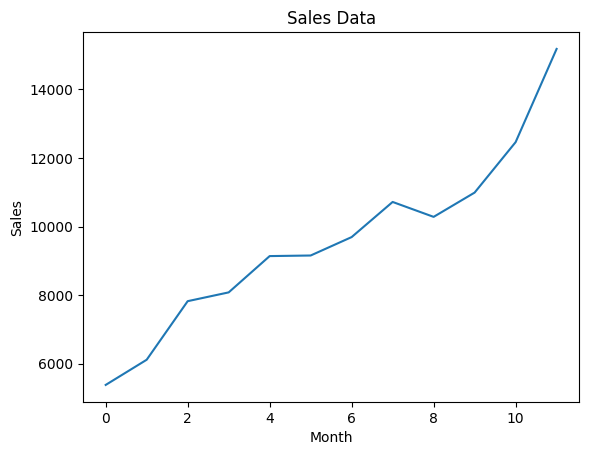

In [3]:
# Plot the sales data
plt.plot(df['Sales'])
plt.title('Sales Data')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

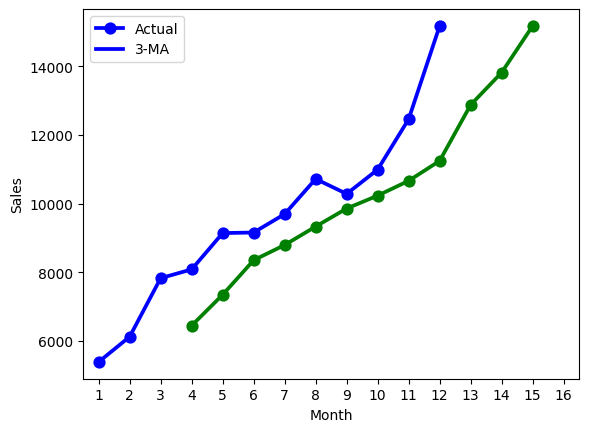

In [7]:
# Using moving average
def moving_average(df, k, to_period):
    moving_average_df = pd.DataFrame(columns=['Period', 'Sales'])
    num_df = len(df)
    for m in range(0, to_period):
        if m < k:
            sale_predict = float('nan')
        else:
            history = df['Sales'][m-k:m]
            sale_predict = history.mean()
        moving_average_df.loc[m] = [m+1, sale_predict]

    moving_average_df['Period'] = moving_average_df['Period'].astype(int)
    return moving_average_df

f, ax = plt.subplots(1, 1)
ma_df = moving_average(df, 3, 16)
sns.pointplot(x='Month', y='Sales', data=df, color='b')
sns.pointplot(x='Period', y='Sales', data=ma_df, color='g')
ax.legend(handles=ax.lines[:len(df)+1], labels=["Actual", "3-MA"])
plt.show()

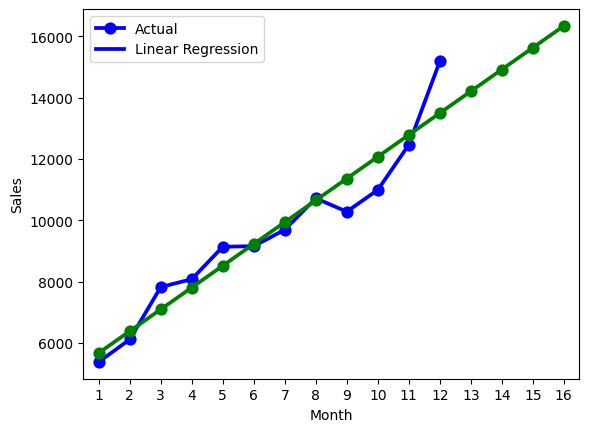

In [9]:
# Using linear regression
def linear_regression(df):
    linear_df = df.copy()
    linear_df['PeriodSales'] = linear_df['Month'] * linear_df['Sales']
    linear_df['Period_2'] = linear_df['Month'] * linear_df['Month']
    linear_df['Sales_2'] = linear_df['Sales'] * linear_df['Sales']
    linear_sum = linear_df.sum()
    linear_mean = linear_df.mean()

    b = (linear_sum['PeriodSales'] - len(df) * linear_mean['Month'] * linear_mean['Sales']) \
        / (linear_sum['Period_2'] - len(df) * linear_mean['Month'] * linear_mean['Month'])
    a = linear_mean['Sales'] - b * linear_mean['Month']
    return a, b

a, b = linear_regression(df)
linear_df = pd.DataFrame(columns=['Period', 'Sales'])
for m in range(1, 17):
    sale = a + b * m
    linear_df.loc[m-1] = [m, sale]
linear_df['Period'] = linear_df['Period'].astype(int)

f, ax = plt.subplots(1, 1)
sns.pointplot(ax=ax, x='Month', y='Sales', data=df, color='b')
sns.pointplot(ax=ax, x='Period', y='Sales', data=linear_df, color='g')
ax.legend(handles=ax.lines[:len(df)+2], labels=["Actual", "Linear Regression"])
plt.show()


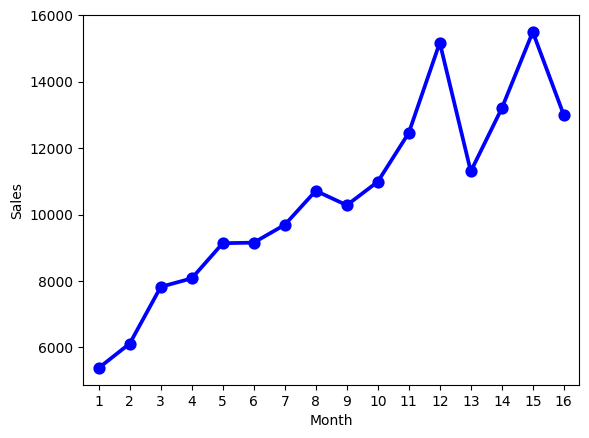

In [10]:
# Ground truth data
eval_data = {
    "Month": [13, 14, 15, 16],
    "Sales": [11300, 13200, 15500, 13000]
}
eval_df = pd.DataFrame(eval_data)
eval_df = pd.concat([df, eval_df], ignore_index=True)

sns.pointplot(x='Month', y='Sales', data=eval_df, color='b')
plt.show()

In [11]:
# Compare using mean square error (MSE)
def mean_squared_error(actual, predicted):
    return ((actual - predicted) ** 2).mean()

mse_ma = mean_squared_error(eval_df['Sales'][12:16], ma_df['Sales'][12:16])
mse_lr = mean_squared_error(eval_df['Sales'][12:16], linear_df['Sales'][12:16])

print("MSE of Moving Average: ", mse_ma)
print("MSE of Linear Regression: ", mse_lr)

# Determine the best prediction method
if mse_ma < mse_lr:
    print("Moving Average produced the best prediction.")
else:
    print("Linear Regression produced the best prediction.")

MSE of Moving Average:  989865.5648148142
MSE of Linear Regression:  5629390.883826157
Moving Average produced the best prediction.


IMPORT TIME SERIES IN PYTHON

In [12]:
# Importing and Inspecting Datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
# Example 1: Vacation dataset

# Read in data
# https://trends.google.com/trends/explore?date=all&geo=US&q=vacation, google trends, term search of the word "vacation", count data
# Date period range: January 2004 to October 2019, 15 years, data is monthly
vacation = pd.read_csv(r'C:\Users\ungdu\Downloads\vacation.csv', skiprows=2)
vacation.head()

,Month,vacation: (United States)
0,2004-01,94
1,2004-02,89
2,2004-03,86
3,2004-04,79
4,2004-05,89


In [31]:
# Check for missing values
print(vacation.isna().sum())

Num_Search_Vacation    0
dtype: int64


In [32]:
# Fix column names
col_names = ['Month', 'Num_Search_Vacation']
vacation.columns = col_names
print(vacation.tail())

ValueError: Length mismatch: Expected axis has 1 elements, new values have 2 elements